In [1]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [2]:


import tensorflow as tf
print(f"TensorFlow version:{tf.__version__}")


TensorFlow version:2.18.0


In [3]:
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")


--2025-04-29 02:54:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-04-29 02:54:04 (12.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

In [5]:
import tensorflow_datasets as tfds

In [6]:
datasets_list=tfds.list_builders()

target_dataset="food101"
print(f"'{target_dataset}' in TensorFlow Datasets : {target_dataset in datasets_list} ")

'food101' in TensorFlow Datasets : True 


In [7]:
(train_data,test_data),ds_info=tfds.load(name="food101",
                                         split=["train","validation"],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.9RCIAN_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.9RCIAN_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [8]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [9]:
class_names=ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [10]:
train_one_sample=train_data.take(1)

In [11]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
for image,label in train_one_sample:
  print(f"""
  Image shape: {image.shape} Imagee dtype: {image.dtype}
        Target class from Food101 (tensor form): {label}
        Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 512, 3) Imagee dtype: <dtype: 'uint8'>
        Target class from Food101 (tensor form): 1
        Class name (str form): baby_back_ribs
        


In [13]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 95,  95,  25],
        [ 87,  87,  17],
        [ 96,  93,  26],
        ...,
        [178, 189, 191],
        [180, 191, 193],
        [178, 189, 191]],

       [[ 92,  92,  22],
        [ 86,  86,  16],
        [ 91,  88,  21],
        ...,
        [183, 194, 196],
        [184, 195, 197],
        [180, 191, 193]],

       [[ 97,  94,  25],
        [ 92,  89,  20],
        [ 89,  86,  19],
        ...,
        [187, 198, 200],
        [185, 199, 200],
        [181, 195, 196]],

       ...,

       [[205, 196, 155],
        [205, 196, 155],
        [203, 194, 155],
        ...,
        [216, 228, 226],
        [214, 226, 224],
        [207, 219, 217]],

       [[209, 197, 155],
        [210, 198, 156],
        [207, 198, 159],
        ...,
        [216, 228, 226],
        [212, 224, 222],
        [212, 224, 222]],

       [[202, 191, 146],
        [207, 195, 153],
        [207, 198, 157],
        ...,
        [217, 229, 22

In [14]:
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

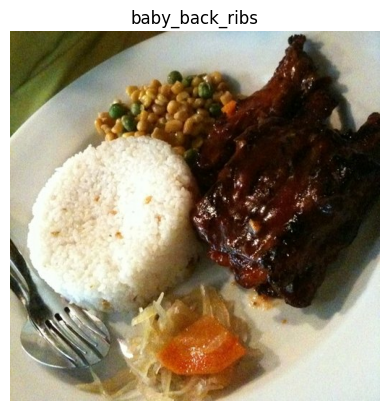

In [15]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [16]:
def preprocess_img(image,label,img_shape=224):
  image=tf.image.resize(image,[img_shape,img_shape])
  return tf.cast(image,tf.float32),label


In [17]:
preprocessed_img=preprocess_img(image,label)[0]
print(f"Image before preprocessing: \n {image[:2]}....,\nShape : {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing: \n {preprocessed_img[0:2]}....,\nShape: {preprocessed_img.dtype}")

Image before preprocessing: 
 [[[ 95  95  25]
  [ 87  87  17]
  [ 96  93  26]
  ...
  [178 189 191]
  [180 191 193]
  [178 189 191]]

 [[ 92  92  22]
  [ 86  86  16]
  [ 91  88  21]
  ...
  [183 194 196]
  [184 195 197]
  [180 191 193]]]....,
Shape : (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing: 
 [[[ 88.755104  88.755104  18.755102]
  [ 88.341835  85.341835  18.341835]
  [ 86.377556  81.16327   17.591837]
  ...
  [182.5153   193.5153   195.5153  ]
  [181.47958  192.47958  194.47958 ]
  [181.39784  192.39784  194.39784 ]]

 [[ 96.57143   93.57143   24.571428]
  [ 92.38265   89.38265   22.382656]
  [ 93.72959   88.515305  24.94388 ]
  ...
  [189.42863  200.42863  202.42863 ]
  [189.78568  200.78568  202.78568 ]
  [183.90295  197.90295  198.90295 ]]]....,
Shape: <dtype: 'float32'>


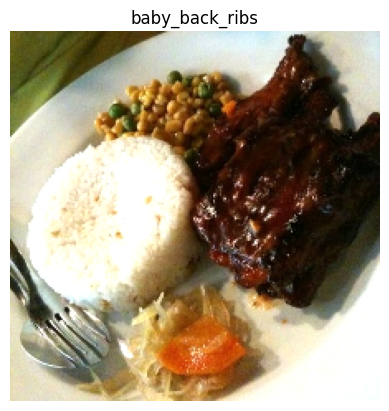

In [18]:
plt.imshow(preprocessed_img/225.)
plt.title(class_names[label])
plt.axis(False);

In [19]:
train_data=train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)

train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data=test_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)

test_data=test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [20]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [21]:
from helper_functions import create_tensorboard_callback

checkpoint_path="model_checkpoint/cp.ckpt.weights.h5"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                    monitor="val_accuracy",
                                                    save_best_only=True,
                                                    save_weights_only=True,
                                                    verbose=0)

In [22]:
 from tensorflow.keras import mixed_precision
 mixed_precision.set_global_policy(policy="mixed_float16")

In [23]:
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

In [24]:
from tensorflow.keras import layers

input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=input_shape,name="input_layer")
x=base_model(inputs,training=False)
x=layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x=layers.Dense(len(class_names))(x)

outputs=layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)
model=tf.keras.Model(inputs,outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (None, 101)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [26]:
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer True float32 <DTypePolicy "mixed_float16">
efficientnetb0 False float32 <DTypePolicy "mixed_float16">
pooling_layer True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [27]:
for layer in model.layers[1].layers[:20]:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer False float32 <DTypePolicy "mixed_float16">
rescaling False float32 <DTypePolicy "mixed_float16">
normalization False float32 <DTypePolicy "mixed_float16">
rescaling_1 False float32 <DTypePolicy "mixed_float16">
stem_conv_pad False float32 <DTypePolicy "mixed_float16">
stem_conv False float32 <DTypePolicy "mixed_float16">
stem_bn False float32 <DTypePolicy "mixed_float16">
stem_activation False float32 <DTypePolicy "mixed_float16">
block1a_dwconv False float32 <DTypePolicy "mixed_float16">
block1a_bn False float32 <DTypePolicy "mixed_float16">
block1a_activation False float32 <DTypePolicy "mixed_float16">
block1a_se_squeeze False float32 <DTypePolicy "mixed_float16">
block1a_se_reshape False float32 <DTypePolicy "mixed_float16">
block1a_se_reduce False float32 <DTypePolicy "mixed_float16">
block1a_se_expand False float32 <DTypePolicy "mixed_float16">
block1a_se_excite False float32 <DTypePolicy "mixed_float16">
block1a_project_conv False float32 <DTypePolicy "mixed_float16"

In [ ]:
tf.get_logger().setLevel("ERROR")

history_101_food_classes_feature_extract=model.fit(train_data,
                                                   epochs=3,
                                                   steps_per_epoch=len(train_data),
                                                   validation_data=test_data,
                                                   validation_steps=int(0.15*len(test_data)),
                                                   callbacks=[create_tensorboard_callback("training_logs","efficientnetb0_101_classes_all_data_feature_extract"), model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20250429-030828
Epoch 1/3
 112/2368 ━━━━━━━━━━━━━━━━━━━━ 7:04:48 11s/step - accuracy: 0.1174 - loss: 4.1890

In [ ]:
result_feature_extract_model=model.evaluate(test_data)
result_feature_extract_model

In [ ]:

def create_model():

  input_shape=(224,224,3)
  base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
  base_model.trainable=False

  inputs=layers.Input(shape=input_shape,name="input_layer")
  x=base_model(inputs,training=False)
  x=layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x=layers.Dense(len(class_names))(x)

  outputs=layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)
  model=tf.keras.Model(inputs,outputs)
  return model

created_model=tf.keras.Model(inputs, outputs)
created_model.compile(loss="sparse_categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

created_model.load_weights(checkpoint_path)

results_created_model_with_loaded_weights=created_model.evaluate(test_data)



In [ ]:
import numpy as np
assert np.isclose(result_feature_extract_model,results_created_model_with_loaded_weights).all()

In [ ]:
for layer in created_model.layers[1].layers[:20]:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
save_dir="07_efficientnetb0_feature_extract_model_mixed_precision.keras"
model.save(save_dir)

In [ ]:
loaded_saved_model=tf.keras.models.load_model(save_dir)

In [ ]:
for layer in loaded_saved_model.layers[1].layers[:20]:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

In [ ]:
results_loaded_saved_model=loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

In [ ]:
import numpy as np
assert np.isclose(result_feature_extract_model,results_loaded_saved_model).all()

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

In [ ]:
!mkdir downloaded_gs_model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

In [ ]:
loaded_gs_model = tf.keras.models.load_model("downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

In [ ]:
loaded_gs_model.summary()

In [ ]:
results_loaded_gs_model=loaded_gs_model.evaluate(test_data)
results_loaded_gs_model

In [ ]:
for layer in loaded_gs_model.layers:
  layers.trainable=True
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

In [ ]:
for layer in loaded_gs_model.layers[1].layers[0:20]:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

In [ ]:
early_stopping-tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                patience=3)

checkpoint_path="fine_tune_checkpoints/"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                    save_best_only=True,
                                                    monitor="val_loss")

In [ ]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                               factor=0.2,
                                               patience=2,
                                               verbose=1,
                                               min_lr=1e-7)

In [ ]:
loaded_gs_model.compile(loss="sparse_categorical_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(0.0001),
                        metrics=["accuracy"])

In [ ]:
history_101_food_classes_all_data_fine_tune=loaded_gs_model.fit(train_data,
                                                                epochs=100,
                                                                validation_data=test_data,
                                                                validation_steps=int(len(test_data)),
                                                                callbacks=[create_tensorboard_callbacks("training_logs","efficientb0_101_classes_all_data_fine_tuning"),
                                                                           model_checkpoint,
                                                                           early_stopping,
                                                                           reduce_lr])

In [ ]:
loaded_gs_model.save("07_efficientnetb0_fine_tuned_101_claases_mixed_precision.keras")

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip

In [ ]:
!mkdir downloaded_fine_tuned_gs_model
!unzip 07_efficientnetb0_fine_tuned_101_classes_mixed_precision -d downloaded_fine_tuned_gs_model

In [ ]:
loaded_fine_tuned_gs_model=tf.keras.models.load_model("downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

In [ ]:
loaded_fine_tuned_gs_model.summary()

In [ ]:
results_downloaded_fine_tuned_gs_model=loaded_fine_tuned_gs_model.evaluate(test_data)
results_downloaded_fine_tuned_gs_model

In [1]:
import ipywidgets as widgets
widgets.IntSlider()


IntSlider(value=0)